In [32]:
import numpy as np
from scipy.spatial import ConvexHull#, convex_hull_plot_2d


rng = np.random.default_rng()

points = rng.random((15, 3))   # 15 random points in 3-D
print(points)

hull = ConvexHull(points)
print(hull)

[[0.25231807 0.84769364 0.08628224]
 [0.62421814 0.96701028 0.17758544]
 [0.90364235 0.86505254 0.87943931]
 [0.40129588 0.84201858 0.15611493]]


[[1 2 0]
 [3 2 0]
 [3 1 0]
 [3 1 2]]


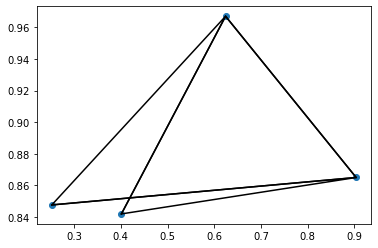

In [34]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

print(hull.simplices)

In [2]:
# calculate distance from mean

import cv2
import numpy as np
import math

source = './images/apple.png'

img = cv2.imread(source)
gray = cv2.imread(source, 0)
diff = cv2.imread(source)


cv2.imwrite('gray.png', gray)

height = img.shape[0]
width = img.shape[1]


value_B = 0
value_G = 0
value_R = 0


for y in range(height):
    for x in range(width):
        
        value_B += img[y,x,0]
        value_G += img[y,x,1]
        value_R += img[y,x,2]
     
        #diff[y,x,1] = 0


value_B = value_B/(height*width)
value_G = value_G/(height*width)
value_R = value_R/(height*width)


print(value_B, value_G, value_R)

for y in range(height):
    for x in range(width):
        
        gray[y,x] = math.sqrt(pow((value_B - img[y,x,0]), 2) + pow((value_G - img[y,x,1]), 2) + pow((value_R - img[y,x,2]), 2))
        
        #diff[y,x,0] = gray[y,x]
        #diff[y,x,2] = 255 - gray[y,x]

cv2.imwrite('DistanceFromMean.png', gray)
#cv2.imwrite('diff.png', diff)



35.626341152936895 58.998968427159916 79.95808112297475


True

In [3]:
# Generating mask

import cv2

mask = cv2.imread('./images/cheat_mask.png')

height = mask.shape[0]
width = mask.shape[1]

for y in range(height):
    for x in range(width):
        if(y==0 or x==0 or y==height-1 or x==width-1):
            mask[y,x,0] = 120
            mask[y,x,1] = 120
            mask[y,x,2] = 120
        #else:
         #   mask[y,x,0] = 255
          #  mask[y,x,1] = 255
           # mask[y,x,2] = 255
            
            
cv2.imwrite('./mask.png', mask)
            


True

In [6]:
import math
angle = 45
angle = (angle/360) * math.pi * 2

print('sin:', math.sin(angle))
print('cos:', math.cos(angle))

sin: 0.7071067811865475
cos: 0.7071067811865476


In [ ]:
'''
lightMap[2,2,2] = -1
print("if it's -1, error!: ", lightMap[2,2,2])


light_angle += 180
light_direction = (light_angle/360) * 2*(math.pi)  # 0 ~ 2PI

if light_angle%360 < 90:
    sign_1 = 1
    sign_2 = 1
elif light_angle%360 < 180:
    sign_1 = -1
    sign_2 = 1
elif light_angle%360 < 270:
    sign_1 = -1
    sign_2 = -1
else:
    sign_1 = 1
    sign_2 = -1

print(sign_1, sign_2)

shadowMap = min(0, sign_1) * conv_right * round(math.cos(light_direction)) + min(0, sign_2) * conv_top * round(math.sin(light_direction)) + min(0, sign_1) * (-1) * conv_left * round(math.sin(light_direction)) + min(0, sign_2) * (-1) * conv_down * round(math.cos(light_direction))

'''

In [ ]:
# combine 4 conv_out to get coarse light map
conv_right = cv2.imread('conv_right.png')
conv_top = cv2.imread('conv_top.png')
conv_left = cv2.imread('conv_left.png')
conv_down = cv2.imread('conv_down.png')

density = cv2.imread('./images/stroke_density_'+source+'.png')
density = cv2.GaussianBlur(density, (3, 3),0)

original = cv2.imread('./images/'+source+'.png')
#original = np.clip(original, 50, 205)
mask = cv2.imread('./images/grape_mask.png')

# light
light_angle = 45# start from right side, clockwise
light_hue = 120   # 0~360
light_saturation = 255


light_direction = (light_angle/360) * 2*(math.pi)  # 0 ~ 2PI
#effectMap = conv_top * round((math.sin(light_direction))) + conv_right * round((math.cos(light_direction))) + (-1)*conv_down * (math.sin(light_direction)) + (-1)*conv_left * (math.cos(light_direction))
#lightMap = np.zeros_like(original)  # uint8
#lightMap = np.clip(effectMap.astype(np.uint8), 0, 255)
#shadowMap = np.clip(effectMap, -255, 0)

if light_angle%360 < 90:
    lightMap = conv_right * round(math.cos(light_direction)) + conv_top * round(math.sin(light_direction))
    shadowMap = conv_left * round(math.cos(light_direction)) + conv_down * round(math.sin(light_direction))
    
elif light_angle%360 < 180:
    lightMap = conv_top * round(math.cos(light_direction-math.pi/2)) + conv_left * round(math.sin(light_direction-math.pi/2))
    shadowMap = conv_down * round(math.cos(light_direction-math.pi/2)) + conv_right * round(math.sin(light_direction-math.pi/2))
    
elif light_angle%360 < 270:
    lightMap = conv_left * round(math.cos(light_direction-math.pi)) + conv_down * round(math.sin(light_direction-math.pi))
    shadowMap = conv_right * round(math.cos(light_direction-math.pi)) + conv_top * round(math.sin(light_direction-math.pi))

else:
    lightMap = conv_down * round(math.cos(light_direction-math.pi/2*3)) + conv_right * round(math.sin(light_direction-math.pi/2*3))
    shadowMap = conv_top * round(math.cos(light_direction-math.pi/2*3)) + conv_left * round(math.sin(light_direction-math.pi/2*3))

    
#lightMap = max(0, sign_1) * conv_right * round(math.cos(light_direction)) + max(0, sign_2) * conv_top * round(math.sin(light_direction)) + max(0, sign_1) * (-1) * conv_left * round(math.sin(light_direction)) + max(0, sign_2) * (-1) * conv_down * round(math.cos(light_direction))


hsv_lightMap = cv2.cvtColor(lightMap, cv2.COLOR_BGR2HSV)
hsv_lightMap[:,:,0] = light_hue // 2  # HSV in opencv, hue range is [0,179]
hsv_lightMap[:,:,1] = np.clip(hsv_lightMap[:,:,1], light_saturation, a_max=255)
#hsv_lightMap[:,:,2] = 0

lightMap = cv2.cvtColor(hsv_lightMap, cv2.COLOR_HSV2BGR)

cv2.imwrite('lightMap.png', lightMap+127)
cv2.imwrite('shadowMap.png', shadowMap+127)

result = original + lightMap * (1-(density/255)) * 4 * (mask/255)- shadowMap * (1-(density/255)) * 2 * (mask/255)
#reslut = result - shadowMap * (1-(density/255)) * 40 * (mask/255)


cv2.imwrite('effectMap.png', effectMap+127)
cv2.imwrite('result.png', result)


## Testing area
'''
lightMap += cv2.GaussianBlur(lightMap,(101,101),0)*1
lightMap += cv2.GaussianBlur(lightMap,(201,201),0)*1
lightMap += cv2.GaussianBlur(lightMap,(401,401),0)*1
'''
#effectMap = lightMap - shadowMap
#print(effectMap)
#cv2.imwrite('effectMap.png', effectMap+127)
#intensity = 1
#effectMap = effectMap * (1-(density/255)) * intensity #* (mask/255)
#result = original + effectMap






In [ ]:
# combine 4 conv_out to get coarse light map
conv_right = cv2.imread('conv_right.png')
conv_top = cv2.imread('conv_top.png')
conv_left = cv2.imread('conv_left.png')
conv_down = cv2.imread('conv_down.png')

#density = cv2.imread('./images/stroke_density_'+source+'.png')
density = cv2.imread('./images/'+source+'.png')
density = cv2.GaussianBlur(density, (3, 3),0)

original = cv2.imread('./images/'+source+'.png')
mask = cv2.imread('./images/blind_mask.png')

# light
light_angle = 145# start from right side, clockwise
light_hue = 44   # 0~360
light_saturation = 200


light_direction = (light_angle/360) * 2*(math.pi)  # 0 ~ 2PI
#effectMap = conv_top * round((math.sin(light_direction))) + conv_right * round((math.cos(light_direction))) + (-1)*conv_down * (math.sin(light_direction)) + (-1)*conv_left * (math.cos(light_direction))
#lightMap = np.zeros_like(original)  # uint8
#lightMap = np.clip(effectMap.astype(np.uint8), 0, 255)
#shadowMap = np.clip(effectMap, -255, 0)

if light_angle%360 < 90:
    lightMap = conv_right * round(math.cos(light_direction)) + conv_top * round(math.sin(light_direction))
    shadowMap = conv_left * round(math.cos(light_direction)) + conv_down * round(math.sin(light_direction))
    
elif light_angle%360 < 180:
    lightMap = conv_top * round(math.cos(light_direction-math.pi/2)) + conv_left * round(math.sin(light_direction-math.pi/2))
    shadowMap = conv_down * round(math.cos(light_direction-math.pi/2)) + conv_right * round(math.sin(light_direction-math.pi/2))
    
elif light_angle%360 < 270:
    lightMap = conv_left * round(math.cos(light_direction-math.pi)) + conv_down * round(math.sin(light_direction-math.pi))
    shadowMap = conv_right * round(math.cos(light_direction-math.pi)) + conv_top * round(math.sin(light_direction-math.pi))

else:
    lightMap = conv_down * round(math.cos(light_direction-math.pi/2*3)) + conv_right * round(math.sin(light_direction-math.pi/2*3))
    shadowMap = conv_top * round(math.cos(light_direction-math.pi/2*3)) + conv_left * round(math.sin(light_direction-math.pi/2*3))

    
#lightMap = max(0, sign_1) * conv_right * round(math.cos(light_direction)) + max(0, sign_2) * conv_top * round(math.sin(light_direction)) + max(0, sign_1) * (-1) * conv_left * round(math.sin(light_direction)) + max(0, sign_2) * (-1) * conv_down * round(math.cos(light_direction))


hsv_lightMap = cv2.cvtColor(lightMap, cv2.COLOR_BGR2HSV)
hsv_lightMap[:,:,0] = light_hue // 2  # HSV in opencv, hue range is [0,179]
hsv_lightMap[:,:,1] = np.clip(hsv_lightMap[:,:,1], light_saturation, a_max=255)
#hsv_lightMap[:,:,2] = 0

lightMap = cv2.cvtColor(hsv_lightMap, cv2.COLOR_HSV2BGR)

cv2.imwrite('lightMap.png', lightMap+127)
cv2.imwrite('shadowMap.png', shadowMap+127)


intensity = 6
result = original + lightMap * (1-(density/255)) * intensity * (mask/255) - shadowMap * (1-(density/255)) * (intensity/2) * (mask/255)
#reslut = result - shadowMap * (1-(density/255)) * 40 * (mask/255)


#cv2.imwrite('effectMap.png', effectMap+127)
cv2.imwrite('result.png', result)

all127 = np.clip(original, 127, 127)
all127 = all127 + lightMap
all127 = all127 - shadowMap
cv2.imwrite('effect.png', all127)


## Testing area
'''
lightMap += cv2.GaussianBlur(lightMap,(101,101),0)*1
lightMap += cv2.GaussianBlur(lightMap,(201,201),0)*1
lightMap += cv2.GaussianBlur(lightMap,(401,401),0)*1
'''
#effectMap = lightMap - shadowMap
#print(effectMap)
#cv2.imwrite('effectMap.png', effectMap+127)
#intensity = 1
#effectMap = effectMap * (1-(density/255)) * intensity #* (mask/255)
#result = original + effectMap




